# Practical 49: Radiometric dating of Precambrian Terranes in the UK

1 . [Intro]<br>

* A Juypter Notebook for Practical 49: Radiometric dating of Precambrian Terranes in the UK
* If this is your first time using jupyter notebooks then under the <i> 'Help'</i> tab there is a <i> 'User Interface Tour'

2 . [Importing CSV files](#section_2)
    
* Import data from a CSV file to a pandas dataframe
* Plot the data as a scatter plot
    
3 . [Ordinary Least Squares - Linear Regression of Rb-Sr Data](#section_3)

* Fit a regression line to the data using the ordinary least squares regression method

4 . [Histogram of Terran Ages](#section_4)<br>

* Plot age data for the British Isle terranes as a histogram

<b> Import required python modules <br> </b> Note - working directory needs to be the directory with CSV files present

In [155]:
# Note - modules are often abbreviated to condense code

# Pandas is a common module for storing data in tabular form https://pandas.pydata.org/about/
import pandas as pd

# NumPy is a numerical computing module for python - many other modules are built on top of it https://numpy.org/learn/
import numpy as np

# Matplotlib is one of the most commonly used and flexible plotting modules used in python https://matplotlib.org/
import matplotlib.pyplot as plt

# Import stats models for the OLS linear regression
import statsmodels.api as sm

# The OS in Python provides functions for interacting with the operating system
import os
# if you are unsure which directory is being used use 'os.getcwd()' to display the current working directory
# if you need to change the working directory then use the 'os.chdir(path)'

### 2 . Importing CSV Files <br> <a id='section_2'></a>

Import data from a CSV file into a pandas dataframe

In [156]:
Rb_Sr_df = pd.read_csv('1A_Practical_49_Sourie_Sr.csv',index_col='Sample No.')

Print the dataframe <br> <i> (Not required but useful for checking import is successful)

In [157]:
Rb_Sr_df

,87Rb.86Sr,87Sr.86Sr
Sample No.,,
1,0.336,0.71395
2,0.133,0.70665
3,0.234,0.71038
4,0.352,0.71440
5,0.074,0.70458
6,0.297,0.71221
7,0.149,0.70757
8,0.488,0.71901
9,0.133,0.70683


Plot the data as scatter plot

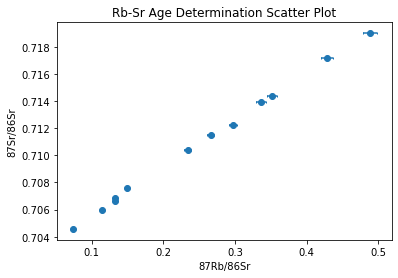

In [158]:
# Define x and y data - Dataframe['Column Name']
x = Rb_Sr_df['87Rb.86Sr']
y = Rb_Sr_df['87Sr.86Sr']
xerr = Rb_Sr_df['87Rb.86Sr']*0.02
yerr = 8e-5

# Plot the scatter plot (with uncertainty)
plt.errorbar(x,y, yerr=yerr, xerr=xerr, fmt = 'o', capsize=1)
plt.title("Rb-Sr Age Determination Scatter Plot")
plt.xlabel("87Rb/86Sr")
plt.ylabel("87Sr/86Sr")
plt.show()

<a id='section_id'></a>

### 3 . Ordinary Least Squares - Linear Regression of Rb-Sr Data <br> <a id='section_3'></a>

OLS Plot

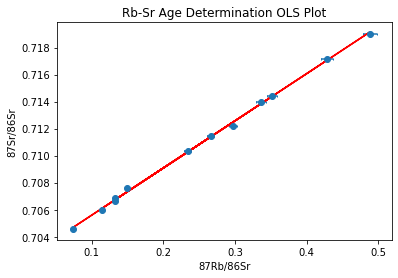

In [160]:
# Use the numpy least squares polynomial fit to obtain m and c for equation y = mx+c
m, c = np.polyfit(x, y, 1)

# Plot scatter plot of data points
plt.errorbar(x,y, yerr=yerr, xerr=xerr, fmt = 'o', capsize=1)

# Plot linear regression model through data points
plt.plot(x, m*x + c, c = 'r')
plt.title("Rb-Sr Age Determination OLS Plot")
plt.xlabel("87Rb/86Sr")
plt.ylabel("87Sr/86Sr")
plt.show()

OLS Regression Results (extra) <br> <i> (useful to see a breakdown of the ordinary least square linear regression stats)

In [161]:
model = sm.OLS(y, x)
sm.add_constant(c)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              87Sr.86Sr   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              43.51
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                    3.88e-05
Time:                        19:16:58   Log-Likelihood:                         -3.3289
No. Observations:                  12   AIC:                                      8.658
Df Residuals:                      11   BIC:                                      9.143
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/acgk2/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<b> Age Calculation </b> <br>

In [228]:
# Calculate age in years
Age_years =np.log(m+1)/1.42e-11

# Convert age to million of years (Ma)
Age_Ma = Age_years/1e6

# Print result
print("Scourie Dykes Age - {} Ma".format(Age_Ma))

Scourie Dykes Age - 2415.398434673979 Ma


### 4 . Histogram of Terran Ages <br> <a id='section_4'></a>

Import CSV data into a pandas dataframe

In [229]:
Age_Pattern_df = pd.read_csv('U-pb_revised_data_compilation.csv', engine='python', index_col='Terrane')

Slice dataframe into terranes from Gondwana & Laurentia

In [230]:
Laurentia = Age_Pattern_df[Age_Pattern_df["Terrane.1"].isin(['Laurentia Hebridean', 'Laurentia'])]
Gondwana = Age_Pattern_df[Age_Pattern_df["Terrane.1"].isin(['Gondwana N. Amorica', 'Gondwana'])]

Plot age data as a histogram

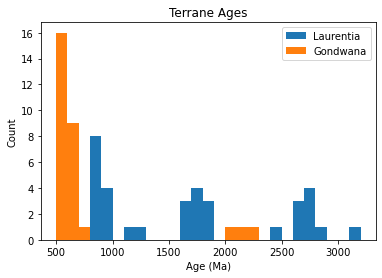

In [231]:
# Define x axis data for histogram
x_hist_L = Laurentia['Age']
x_hist_G = Gondwana['Age']

# Create list of bins
bins_list = np.arange(500,3300,100)

# Plot histogram
plt.hist(x_hist_L, bins_list, label = 'Laurentia')
plt.hist(x_hist_G, bins_list, label = 'Gondwana')

plt.title("Terrane Ages")
plt.xlabel("Age (Ma)")
plt.ylabel("Count")
plt.legend()
plt.show()